In [852]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.impute import SimpleImputer
# from sklearn_pandas import CategoricalImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing


In [853]:
df = pd.read_csv('../data/aqar.csv')

In [854]:
df.isnull().sum()

Unnamed: 0            0
user_id               0
id                    0
title                 0
price                 0
content              94
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg         2746
UserName             93
iam_verified        146
DayOfRent             0
onMarket              0
timeBeforeRent        0
dtype: int64

<AxesSubplot:>

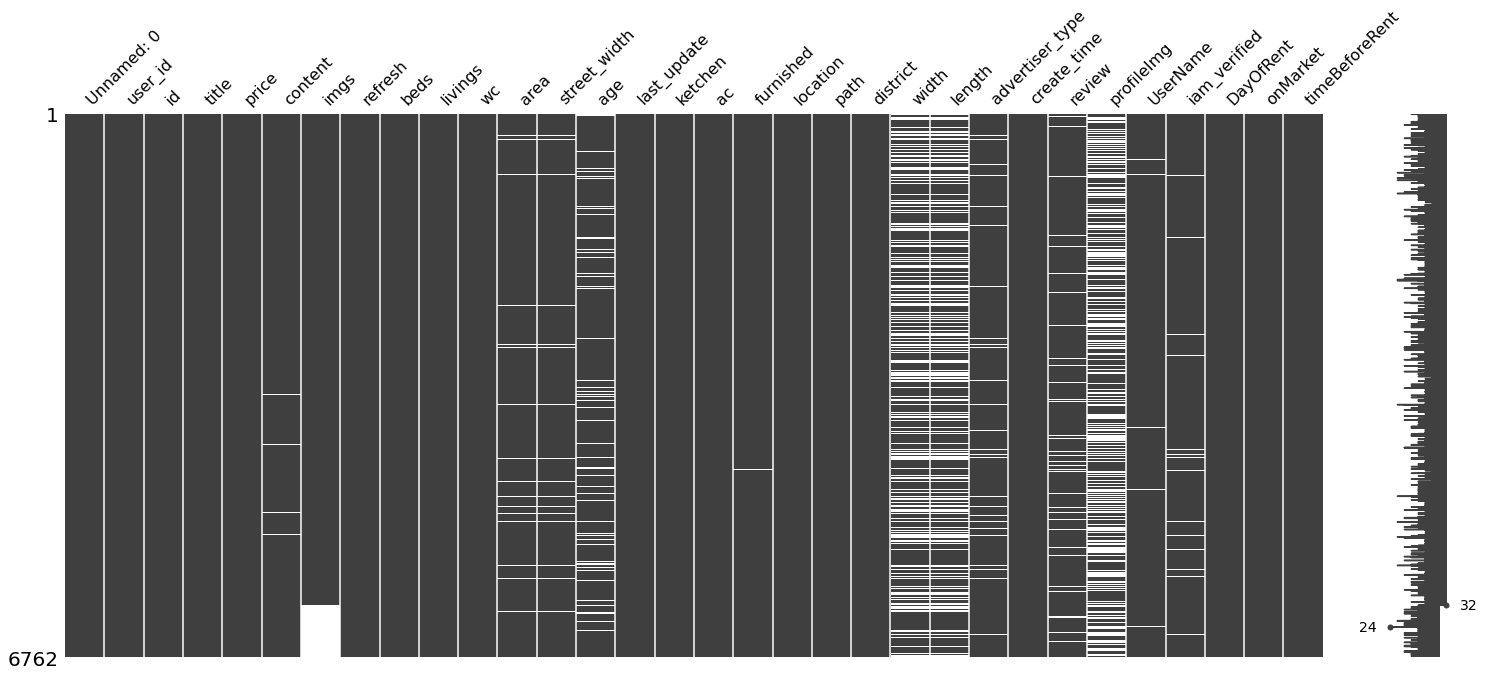

In [855]:
msno.matrix(df)


In [856]:
df['location'].isnull().sum()

0

In [857]:
df['profileImg'].fillna(False , inplace=True)

In [858]:
for index , row in df.iterrows()   :
    # print(row['profileImg'] )
     if (row['profileImg'] != False) :
        df['profileImg'][index] = True

/tmp/ipykernel_20206/3280180632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profileImg'][index] = True


In [859]:
df['profileImg'].value_counts()

True     4016
False    2746
Name: profileImg, dtype: int64

In [860]:
len(df['content'][0])

11

In [861]:
df['content'].fillna('0' , inplace=True)

In [862]:
for index , row in df.iterrows():
    df['content'][index] = len(row['content'])

/tmp/ipykernel_20206/3469686288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'][index] = len(row['content'])


In [863]:
df['iam_verified'].fillna(False , inplace=True)

In [864]:
df['iam_verified'].value_counts()

True     6604
False     158
Name: iam_verified, dtype: int64

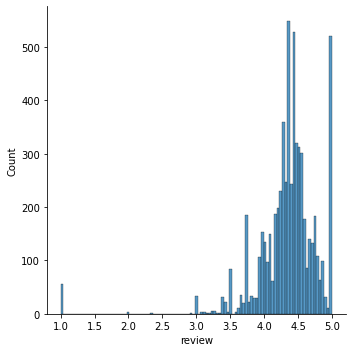

In [865]:
# df['review'].median()
sns.displot(df, x="review")

In [866]:
a = df['imgs'][0]
a

"['014958174_1659666836308.jpg', '014958178_1659666836077.jpg', '014958172_1659666837295.jpg']"

In [867]:
len(ast.literal_eval(a))

3

In [868]:
df['imgs'].fillna(0 , inplace = True)

In [869]:
df['imgs']

0       ['014958174_1659666836308.jpg', '014958178_165...
1       ['004966630_1659781493595.jpg', '004966636_165...
2       ['023243548_1658701693777.jpg', '023243549_165...
3       ['019065004_1659758037501.jpg', '019065000_165...
4       ['017415629_1657025837185.jpg', '017415620_165...
                              ...                        
6757                                                    0
6758                                                    0
6759                                                    0
6760                                                    0
6761                                                    0
Name: imgs, Length: 6762, dtype: object

In [870]:
for index , row in df.iterrows():
    if row['imgs'] == 0 :
        continue
    else:
        a= row['imgs']
        df['imgs'][index] = len(ast.literal_eval(a))

/tmp/ipykernel_20206/4095940630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imgs'][index] = len(ast.literal_eval(a))


In [871]:
df['imgs'].value_counts()

8     880
0     643
7     539
6     505
5     482
9     433
10    397
4     386
1     322
12    318
11    316
3     269
13    213
14    170
15    154
16    145
2     129
18     90
17     86
19     59
21     36
20     36
22     32
23     23
24     21
26     21
30     15
27     14
25     10
28      9
29      7
31      1
37      1
Name: imgs, dtype: int64

In [872]:
a = df['location'][0]
a

"{'lat': 24.80093, 'lng': 46.89689, '__typename': 'Location'}"

In [873]:
print('\"')

"


In [874]:
a = a.replace('\''  , '\"' )

In [875]:
a = json.loads(a)
# a

In [876]:
a

{'lat': 24.80093, 'lng': 46.89689, '__typename': 'Location'}

In [877]:
a.get('lng')

46.89689

In [878]:
df['lat'] = 0
df['lng'] = 0

In [879]:
for index , row in df.iterrows() :
    a = row['location'] 
    a = a.replace('\''  , '\"' )
    a= json.loads(a)
    df['lat'][index] =  a.get('lat')
    df['lng'][index] =  a.get('lng')

/tmp/ipykernel_20206/3726828350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'][index] =  a.get('lat')
/tmp/ipykernel_20206/3726828350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lng'][index] =  a.get('lng')


In [880]:
df.drop(['location'] , axis = 1 , inplace=True)

In [881]:
df.drop(['width', 'length'] , axis=1 , inplace=True)

In [882]:
try:
    df.drop(['Unnamed: 0'] , axis=1 , inplace=True)
except:
    t=1

In [883]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'path', 'district', 'advertiser_type',
       'create_time', 'review', 'profileImg', 'UserName', 'iam_verified',
       'DayOfRent', 'onMarket', 'timeBeforeRent', 'lat', 'lng'],
      dtype='object')

In [884]:
df['UserName'].value_counts()

‏مؤسسة الحلم العربي              251
بوابه النهضه للخدمات العقاريه    163
مكتب عقاري                       108
عقار جديد                         88
مكتب عقاري مميز                   88
                                ... 
0555429978                         1
Sultanh                            1
hhs                                1
أبو سلطان                          1
المشاريع الناجحة                   1
Name: UserName, Length: 1472, dtype: int64

In [885]:
df['user_id'].value_counts() 

1992649    251
901785     162
1958104     96
2072661     88
940589      88
          ... 
1747849      1
393829       1
2590825      1
1019200      1
292698       1
Name: user_id, Length: 1777, dtype: int64

duplicates columns 

In [886]:
df.drop(['UserName'], axis=1 , inplace=True)

In [887]:
df.title.isna().sum()

0

In [888]:
for index , row in df.iterrows():
    if row['title'] == 0 :
        continue
    else:
        # a= 
        df['title'][index] = len(row['title'])

/tmp/ipykernel_20206/1017281869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'][index] = len(row['title'])


In [889]:
df.title.min()

21

In [890]:
df.title.max()

107

In [891]:
df['refresh']==df['last_update']

0        True
1       False
2        True
3       False
4        True
        ...  
6757     True
6758     True
6759    False
6760     True
6761     True
Length: 6762, dtype: bool

In [892]:
df[df['refresh']==df['last_update']].value_counts().sum()

4461

In [893]:
df[df['refresh']!=df['last_update']].value_counts().sum()

929

In [894]:
df.drop('refresh', axis=1 , inplace=True)

In [895]:
df.advertiser_type.value_counts()

exclusive_marketer    2546
normal_marketer       1713
owner                 1656
agent                  607
Name: advertiser_type, dtype: int64

In [896]:
df.review.isna().sum()

399

In [897]:
df["review"].fillna(round(df.review.mean(), 2) , inplace=True)

In [898]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'beds', 'livings',
       'wc', 'area', 'street_width', 'age', 'last_update', 'ketchen', 'ac',
       'furnished', 'path', 'district', 'advertiser_type', 'create_time',
       'review', 'profileImg', 'iam_verified', 'DayOfRent', 'onMarket',
       'timeBeforeRent', 'lat', 'lng'],
      dtype='object')

<AxesSubplot:>

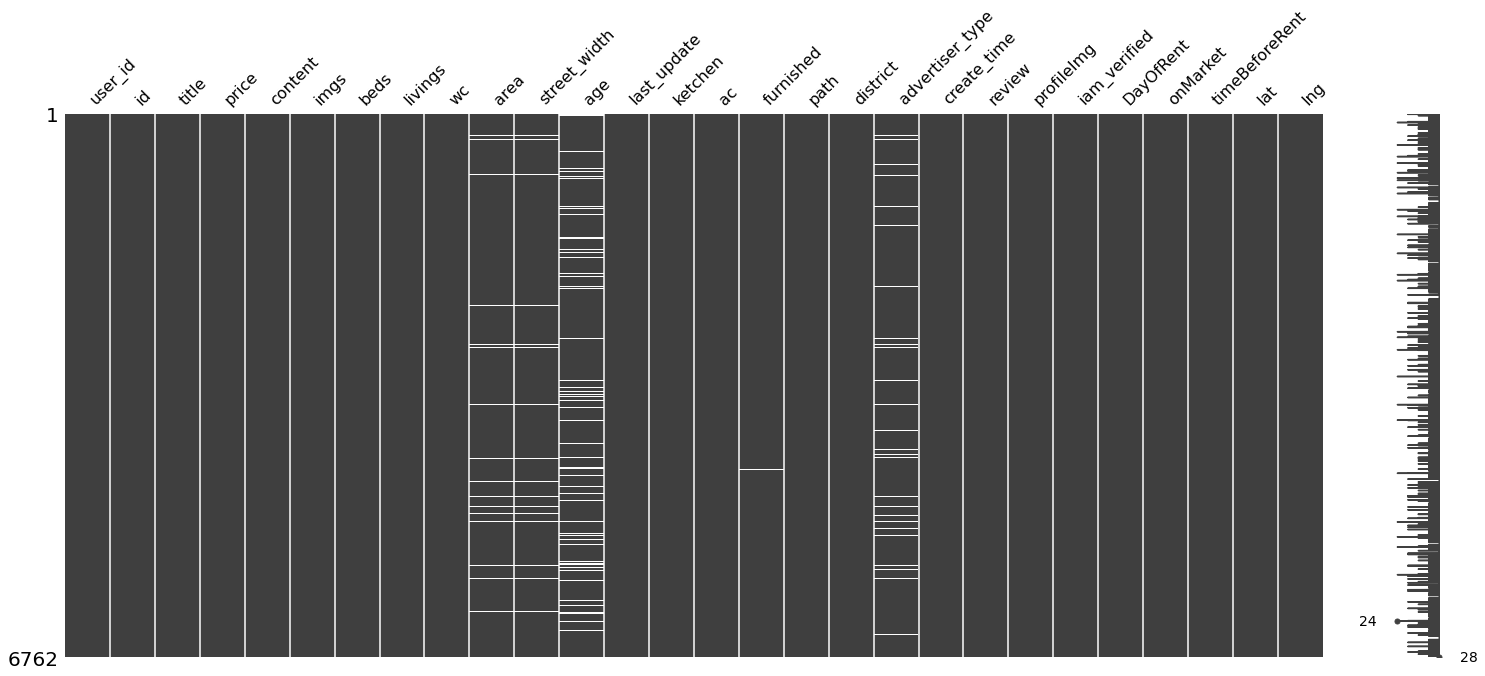

In [899]:
msno.matrix(df)


In [900]:
df = df.dropna(subset=['area' , 'street_width'])

In [901]:
df = df[df['area'] <= 1000]

In [902]:
df['furnished'].isna().sum()

23

In [903]:
df['furnished'].value_counts()

0.0    6005
1.0     503
Name: furnished, dtype: int64

In [904]:
df['furnished'].fillna(0 , inplace=True)

In [905]:
df['advertiser_type'].isna().sum()

168

In [906]:
df['advertiser_type']

0                    owner
1       exclusive_marketer
2          normal_marketer
3                    owner
4          normal_marketer
               ...        
6757    exclusive_marketer
6758    exclusive_marketer
6759                 owner
6760    exclusive_marketer
6761                 owner
Name: advertiser_type, Length: 6531, dtype: object

In [907]:
# from sklearn.impute import KNNImputer
# # I specify the nearest neighbor to be 3 
# fea_transformer = KNNImputer(n_neighbors=3)
# fea_transformer.fit_transform(df[["age"]])


In [908]:
df1 = df.copy()

In [909]:
df['age']

0        9.0
1       12.0
2        NaN
3        0.0
4        9.0
        ... 
6757     0.0
6758    25.0
6759     5.0
6760     1.0
6761     3.0
Name: age, Length: 6531, dtype: float64

In [910]:
# imputer = Pipeline([("imputer", SimpleImputer()),
#                     ("pandarizer",FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["age"])))])

In [911]:
# df['age'] = imputer.fit_transform(df[['age']])

In [912]:
# df.age.isna().sum()

In [913]:
# imp = SimpleImputer().fit_transform(df[["age"]])

In [914]:
# imputer = Pipeline([("imputer", SimpleImputer()),
#                     ("pandarizer",FunctionTransformer(lambda x: pd.DataFrame(x, columns = ["age"])))])

In [915]:
# imputer.fit_transform(df[['age']]).shape

In [916]:
df['age'].shape

(6531,)

In [917]:
# imputer.fit_transform(df[['age']])['age'].shape

In [918]:
# df['age'][0] = imputer.fit_transform(df[['age']])['age'][0]

In [919]:
# for index  in range(len(df['age'])):
#     df['age'][index] = imputer.fit_transform(df[['age']])['age'][index]
#     # print(index)

In [920]:
df[ df['age'].isna()]['age']

2      NaN
14     NaN
18     NaN
20     NaN
24     NaN
        ..
6736   NaN
6738   NaN
6740   NaN
6746   NaN
6752   NaN
Name: age, Length: 665, dtype: float64

In [921]:
df['age'].isna().sum()

665

In [922]:
df['age'] = df['age'].interpolate( method='linear' )

In [923]:
df['age'].isna().sum()

0

<AxesSubplot:>

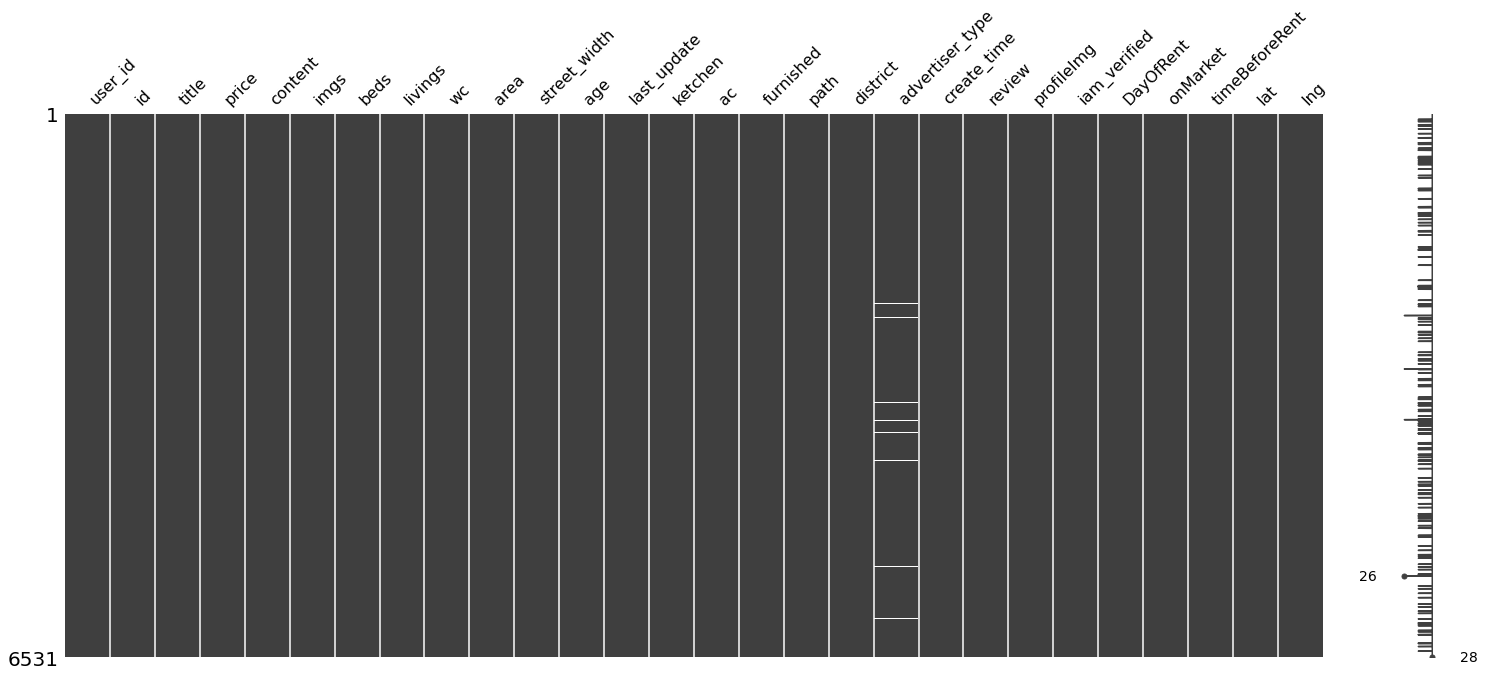

In [924]:
msno.matrix(df)


In [925]:
df['furnished']= df['furnished'].fillna(method='pad')

In [926]:
df['advertiser_type'].value_counts()

exclusive_marketer    2468
normal_marketer       1682
owner                 1614
agent                  599
Name: advertiser_type, dtype: int64

In [927]:
list(df[df['advertiser_type'] == 'normal_marketer'    ]['path'])[23]

'/شقق-للإيجار/الرياض/شمال-الرياض/حي-الملقا/شارع-محمد-بن-عبدالعزيز-الدغيثر-حي-الملقا-الرياض-الرياض-4595552'

In [928]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'beds', 'livings',
       'wc', 'area', 'street_width', 'age', 'last_update', 'ketchen', 'ac',
       'furnished', 'path', 'district', 'advertiser_type', 'create_time',
       'review', 'profileImg', 'iam_verified', 'DayOfRent', 'onMarket',
       'timeBeforeRent', 'lat', 'lng'],
      dtype='object')

In [929]:
df['advertiser_type']= df['advertiser_type'].fillna(method='pad')

In [930]:
df.isna().sum()

user_id            0
id                 0
title              0
price              0
content            0
imgs               0
beds               0
livings            1
wc                 0
area               0
street_width       0
age                0
last_update        0
ketchen            5
ac                 6
furnished          0
path               0
district           0
advertiser_type    0
create_time        0
review             0
profileImg         0
iam_verified       0
DayOfRent          0
onMarket           0
timeBeforeRent     0
lat                0
lng                0
dtype: int64

In [931]:
df= df.fillna(method='pad')

In [932]:
df.loc[0]

user_id                                                      1495817
id                                                           4596035
title                                                             57
price                                                          20000
content                                                           11
imgs                                                               3
beds                                                               3
livings                                                          0.0
wc                                                                 2
area                                                           225.0
street_width                                                    15.0
age                                                              9.0
last_update                               ['2022-08-06', '12:22:15']
ketchen                                                          1.0
ac                                

In [933]:
a = df['path'][0].split('/')[3] 
a.split('-')[0]

'شرق'

In [934]:
df['zone'] = '0'

In [935]:
for index , row in df.iterrows():
    a = row['path'].split('/')[3]
    df['zone'][index] = a.split('-')[0]


/tmp/ipykernel_20206/233973366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zone'][index] = a.split('-')[0]


In [936]:
df['zone'].value_counts()

شمال    3524
شرق     2256
غرب      521
وسط      123
جنوب     107
Name: zone, dtype: int64

In [937]:
df.drop('path' , axis=1 , inplace=True)

In [938]:
df.loc[1]

user_id                                496663
id                                    4599813
title                                      59
price                                   25000
content                                   193
imgs                                       12
beds                                        3
livings                                   1.0
wc                                          2
area                                    130.0
street_width                             30.0
age                                      12.0
last_update        ['2022-08-06', '10:27:56']
ketchen                                   1.0
ac                                        0.0
furnished                                 0.0
district                           حي الفيحاء
advertiser_type            exclusive_marketer
create_time        ['2022-08-06', '10:27:56']
review                                   4.33
profileImg                               True
iam_verified                      

In [939]:
df['zone'].value_counts()

شمال    3524
شرق     2256
غرب      521
وسط      123
جنوب     107
Name: zone, dtype: int64

In [940]:
df.loc[df["zone"] == "شمال", "zone"] = 1
df.loc[df["zone"] == "شرق", "zone"] = 2
df.loc[df["zone"] == "غرب", "zone"] = 3
df.loc[df["zone"] == "وسط", "zone"] = 4
df.loc[df["zone"] == "جنوب", "zone"] = 5

In [941]:
df['zone'].value_counts()

1    3524
2    2256
3     521
4     123
5     107
Name: zone, dtype: int64

In [942]:
label_encoder = preprocessing.LabelEncoder()


In [943]:
df['district'] = label_encoder.fit_transform(df['district'])

In [944]:
df['district'].value_counts()

81     796
44     595
70     564
95     435
94     328
      ... 
54       1
18       1
106      1
60       1
71       1
Name: district, Length: 127, dtype: int64

In [945]:
df['advertiser_type'].value_counts()

exclusive_marketer    2535
normal_marketer       1724
owner                 1656
agent                  616
Name: advertiser_type, dtype: int64

In [946]:
enc=OneHotEncoder()

In [947]:
enc.fit_transform(df[['advertiser_type']])

<6531x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6531 stored elements in Compressed Sparse Row format>

In [948]:
enc_data=pd.DataFrame(enc.fit_transform(df[['advertiser_type']]).toarray())

In [949]:
df1 = df.copy()

In [950]:
New_df=df1.join(enc_data)


In [951]:
New_df.drop('advertiser_type' , axis=1  , inplace=True)

In [955]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6531 entries, 0 to 6761
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         6531 non-null   int64  
 1   id              6531 non-null   int64  
 2   title           6531 non-null   int64  
 3   price           6531 non-null   int64  
 4   content         6531 non-null   int64  
 5   imgs            6531 non-null   int64  
 6   beds            6531 non-null   int64  
 7   livings         6531 non-null   float64
 8   wc              6531 non-null   int64  
 9   area            6531 non-null   float64
 10  street_width    6531 non-null   float64
 11  age             6531 non-null   float64
 12  last_update     6531 non-null   object 
 13  ketchen         6531 non-null   float64
 14  ac              6531 non-null   float64
 15  furnished       6531 non-null   float64
 16  district        6531 non-null   int64  
 17  create_time     6531 non-null   o

In [954]:
df1['zone'].value_counts()

1    3524
2    2256
3     521
4     123
5     107
Name: zone, dtype: int64

In [953]:
# df['title'] =df['title'].astype('int64' )
# df['content'] =df['content'].astype('int64' )
# df['imgs'] =df['imgs'].astype('int64' )